In [2]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.metrics import r2_score
import numpy as np

In [4]:
train=pd.read_csv("sales_train_v2.csv")
test=pd.read_csv("test.csv")
items=pd.read_csv("items.csv")
categories=pd.read_csv("item_categories.csv")
shops=pd.read_csv("shops.csv")
submission=pd.read_csv("sample_submission.csv")

In [5]:
train.head(1)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0


In [6]:
test.head(1)

,ID,shop_id,item_id
0,0,5,5037


In [7]:
items.head(1)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40


In [8]:
categories.head(1)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0


In [9]:
shops.head(1)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0


In [10]:
categories.head(1)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0


In [11]:
dataset=pd.merge(items,train)
dataset.head(1)

,item_name,item_id,item_category_id,date,date_block_num,shop_id,item_price,item_cnt_day
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,01.09.2014,20,54,58.0,1.0


In [12]:
data=pd.merge(dataset,categories)
data.head(1)

,item_name,item_id,item_category_id,date,date_block_num,shop_id,item_price,item_cnt_day,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,01.09.2014,20,54,58.0,1.0,Кино - DVD


In [13]:
datas=pd.merge(data,shops)
datas.head(1)

,item_name,item_id,item_category_id,date,date_block_num,shop_id,item_price,item_cnt_day,item_category_name,shop_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,01.09.2014,20,54,58.0,1.0,Кино - DVD,"Химки ТЦ ""Мега"""


In [14]:
new_data=pd.merge(datas,test)
new_data.head(1)

,item_name,item_id,item_category_id,date,date_block_num,shop_id,item_price,item_cnt_day,item_category_name,shop_name,ID
0,007: КООРДИНАТЫ «СКАЙФОЛЛ»,30,40,13.02.2013,1,56,399.0,1.0,Кино - DVD,"Чехов ТРЦ ""Карнавал""",160687


In [15]:
new_data.keys()

Index(['item_name', 'item_id', 'item_category_id', 'date', 'date_block_num',
       'shop_id', 'item_price', 'item_cnt_day', 'item_category_name',
       'shop_name', 'ID'],
      dtype='object')

In [16]:
new_data.isnull().values.any()

False

In [17]:
new_dataset=pd.concat([new_data.item_id,new_data.item_category_id,new_data.date_block_num,new_data.shop_id,new_data.item_cnt_day],axis=1)

In [18]:
new_dataset.head(1)

,item_id,item_category_id,date_block_num,shop_id,item_cnt_day
0,30,40,1,56,1.0


In [19]:
new_dataset.isnull().values.any()

False

In [20]:
new_dataset.shape

(1224439, 5)

In [21]:
x=new_dataset.iloc[:,[0,2,3]]
x.head(1)

,item_id,date_block_num,shop_id
0,30,1,56


In [22]:
y=new_dataset.iloc[:,4].values
y_new = y.astype(np.int32)
y_new

array([1, 2, 2, ..., 2, 1, 2])

In [23]:
x.shape

(1224439, 3)

In [24]:
y_new.shape

(1224439,)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y_new, test_size=0.2, random_state=12)

In [26]:
rf = RandomForestClassifier()

In [27]:
rf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
predictions = rf.predict(x_test)

In [29]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
y_test[0]

1

In [31]:
confusion_matrix(y_test, predictions)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
rf.score(x_test, y_test)

0.850025317696253

In [46]:

precision_score(y_test,predictions,average='micro')

0.850025317696253

In [35]:
recall_score(y_test, predictions,average='micro')

0.850025317696253

In [36]:
f1_score(y_test, predictions,average='micro')

0.850025317696253

In [49]:
y_pred_prob= rf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=2)

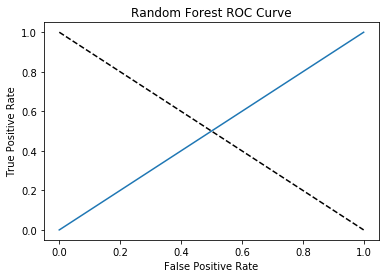

In [50]:
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(fpr, tpr, label='RandomForest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()